# Loading libraries

In [13]:
from pycaret.clustering import *
from pycaret.datasets import get_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = get_data("anomaly")

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


# Exploring data

In [15]:
df.columns.array

<PandasArray>
['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
 'Col10']
Length: 10, dtype: object

In [16]:
df.shape

(1000, 10)

In [17]:
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.491362,0.490200,0.509077,0.497362,0.586120,0.514636,0.508270,0.457541,0.477685,0.495760
std,0.259138,0.251931,0.256606,0.263562,0.334658,0.317470,0.278483,0.220129,0.241432,0.211677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014495
25%,0.287458,0.291449,0.337802,0.256147,0.169680,0.142587,0.246021,0.245539,0.291452,0.329904
50%,0.492070,0.488656,0.510077,0.497537,0.782019,0.537953,0.465679,0.515619,0.387753,0.488891
75%,0.694192,0.686531,0.686914,0.731949,0.847956,0.856512,0.804935,0.626757,0.723674,0.659528
max,0.994431,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988732,1.000000


## Looking into the missing values

<AxesSubplot:>

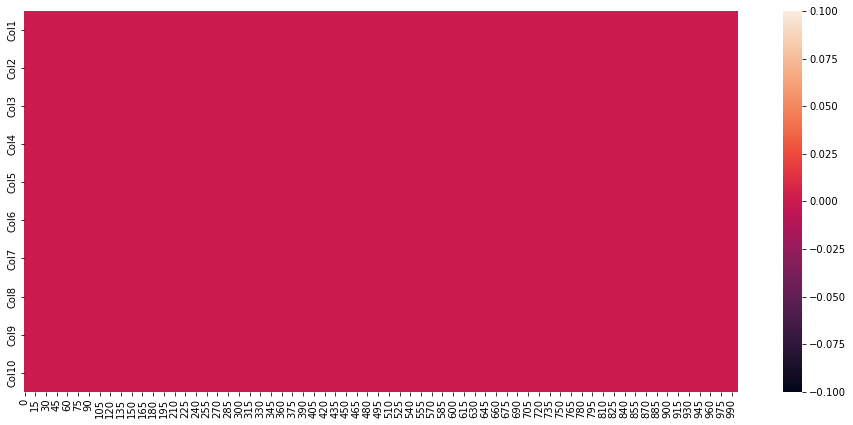

In [18]:
plt.figure(figsize=(16,7)) # seems like our data have missing values !
sns.heatmap(df.isna().transpose())

In [19]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


In [20]:
anom1 = setup(data = df)

,Description,Value
0,session_id,725
1,Original Data,"(1000, 10)"
2,Missing Values,False
3,Numeric Features,10
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1000, 10)"
9,CPU Jobs,-1


In [21]:
models()


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [24]:
model = pycaret.clustering.create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2237,245.9363,1.6375,0,0,0


In [26]:
plot_model(model)